In [1]:
from os import listdir
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np

from matplotlib.mlab import PCA
import matplotlib.cm as cm

from sklearn import neighbors as knn
from sklearn.metrics import confusion_matrix as cm

%matplotlib inline

In [2]:
def plot_confusion_matrix(confmat, labels_names, ax=None):
    pl.figure()
    if ax is None:
        ax = pl.subplot(111)
    cmim = ax.matshow(confmat, interpolation='nearest', cmap='jet')

    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.annotate(str(confmat[i, j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=10, color='white')
    ax.set_xticks(np.arange(confmat.shape[0]))
    ax.set_xticklabels([labels_names[l] for l in range(confmat.shape[0])], rotation='vertical')
    ax.set_yticks(np.arange(confmat.shape[1]))
    ax.set_yticklabels([labels_names[l] for l in range(confmat.shape[1])])
    ax.set_xlabel('predicted label')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('true label')
    pl.colorbar(cmim, shrink=0.7, orientation='horizontal', pad=0.01)
    pl.show()

In [3]:
n_samples_per_slice = 10
slice_overlap = 5

# get the min index and max index to consider when we want to skip x slices at the begining or the end of the file
def first_slices_index(x):
    return x*(n_samples_per_slice - slice_overlap)
def last_slices_index(x, last_index):    # last_index = len(data[f]['timestamp'])-n_samples_per_slice
    return last_index + x*(slice_overlap - n_samples_per_slice)

def slice_generation(data, label=True):
    storage = {}
    for f in data:        
        # iterate through the file to generate slices
        for start_sample in range(0, len(data[f]['timestamp'])-n_samples_per_slice, slice_overlap):
            df_temp = data[f].iloc[start_sample:start_sample+n_samples_per_slice, :]
            df_temp = df_temp.drop(columns='timestamp')
            
            if label:
                # manual labelisation
                if f=='abdos_f5_manon1.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='abdos_f5_manon1.csv':
                    label = 'abdos'
                if f=='abdos_f5_manon2.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='abdos_f5_manon2.csv':
                    label = 'abdos'
                if f=='abdos_f5_manon3.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='abdos_f5_manon3.csv':
                    label = 'abdos'
                if f=='abdos_f5_manon4_valid.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(3, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='abdos_f5_manon4_valid.csv':
                    label = 'abdos'
                if f=='corde_f5_manon1.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='corde_f5_manon1.csv':
                    label = 'corde'
                if f=='corde_f5_manon2.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='corde_f5_manon2.csv':
                    label = 'corde'
                if f=='corde_f5_manon3.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(5, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='corde_f5_manon3.csv':
                    label = 'corde'
                if f=='corde_f5_manon4_valid.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='corde_f5_manon4_valid.csv':
                    label = 'corde'
                if f=='dorsaux_f5_manon1.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='dorsaux_f5_manon1.csv':
                    label = 'dorsaux'
                if f=='dorsaux_f5_manon2.csv' and (start_sample < first_slices_index(0) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='dorsaux_f5_manon2.csv':
                    label = 'dorsaux'
                if f=='dorsaux_f5_manon3.csv' and (start_sample < first_slices_index(0) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='dorsaux_f5_manon3.csv':
                    label = 'dorsaux'
                if f=='dorsaux_f5_manon4_valid.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(5, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='dorsaux_f5_manon4_valid.csv':
                    label = 'dorsaux'
                if f=='squats_f5_manon1.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='squats_f5_manon1.csv':
                    label = 'squats'
                if f=='squats_f5_manon2.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(2, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='squats_f5_manon2.csv':
                    label = 'squats'
                if f=='squats_f5_manon3.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='squats_f5_manon3.csv':
                    label = 'squats'
                if f=='squats_f5_manon4_valid.csv' and (start_sample < first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                    label = 'idle'
                elif f=='squats_f5_manon4_valid.csv':
                    label = 'squats'
            else:
                label = 'unknown'
                
            if label in storage.keys():          # if the label already exists in the dictionary
                temp = storage[label]
                temp.append(df_temp)           # append the new geture to the list
                storage[label] = temp
            else:
                storage[label] = [df_temp,] # otherwise, create a list with one element
                
    return storage

In [4]:
path = "./selected_raw_data/"

## Importation des donnnées
Étapes pour chaque fichier :
- print le nom du fichier
- créer un dataframe à partir des valeurs dans le fichier
- retravailler l'axe du temps pour obtenir une colonne avec le temps écoulé en secondes

In [5]:
data ={}
for f in listdir(path):
    if 'lud' in f or 'D' in f:
        continue
    print(f)
    data[f] = pd.read_csv(path+f)
    start_time = data[f]["timestamp"][0]
    data[f]["timestamp"] = (data[f]["timestamp"]-start_time)/1000

abdos_f5_manon1.csv
abdos_f5_manon2.csv
abdos_f5_manon3.csv
abdos_f5_manon4.csv
corde_f5_manon1.csv
corde_f5_manon2.csv
corde_f5_manon3.csv
corde_f5_manon4.csv
dorsaux_f5_manon1.csv
dorsaux_f5_manon2.csv
dorsaux_f5_manon3.csv
dorsaux_f5_manon4.csv
squats_f5_manon1.csv
squats_f5_manon2.csv
squats_f5_manon3.csv
squats_f5_manon4.csv


##  Plots
### Abdos

c:\users\manon.racine1\appdata\local\continuum\anaconda2\envs\qself\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


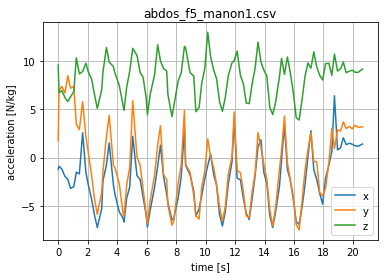

c:\users\manon.racine1\appdata\local\continuum\anaconda2\envs\qself\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


amplitude: {'x': 13.68, 'y': 16.01, 'z': 9.12}
mean:      {'x': -2.36, 'y': -0.8, 'z': 8.26}
std:       {'x': 2.93, 'y': 3.94, 'z': 2.0}


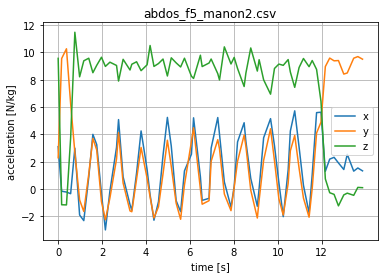

amplitude: {'x': 8.71, 'y': 12.51, 'z': 12.7}
mean:      {'x': 1.53, 'y': 2.32, 'z': 7.43}
std:       {'x': 2.3, 'y': 3.66, 'z': 3.53}


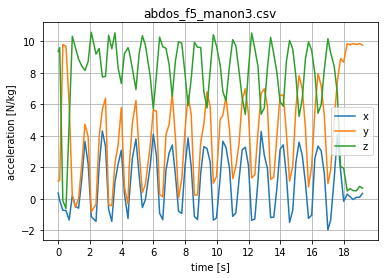

amplitude: {'x': 6.28, 'y': 10.68, 'z': 11.19}
mean:      {'x': 1.05, 'y': 4.16, 'z': 7.61}
std:       {'x': 1.83, 'y': 3.02, 'z': 2.78}


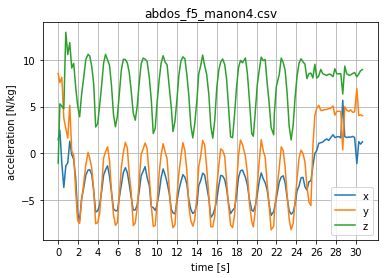

amplitude: {'x': 12.89, 'y': 16.79, 'z': 14.06}
mean:      {'x': -3.0, 'y': -1.64, 'z': 7.31}
std:       {'x': 2.67, 'y': 4.34, 'z': 2.76}


In [6]:
for f in data:
    if "abdos" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.show()
        
        amplitude_temp = {}
        mean_temp = {}
        std_temp = {}
        for axe in data[f]:
            if axe=='timestamp':
                continue
            amplitude_temp[axe] = round(max(data[f][axe])-min(data[f][axe]), 2)
            mean_temp[axe] = round(np.mean(data[f][axe]), 2)
            std_temp[axe] = round(np.std(data[f][axe]), 2)            
            
        print('amplitude: ' + str(amplitude_temp))
        print('mean:      ' + str(mean_temp))
        print('std:       ' + str(std_temp))

### Squats

c:\users\manon.racine1\appdata\local\continuum\anaconda2\envs\qself\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


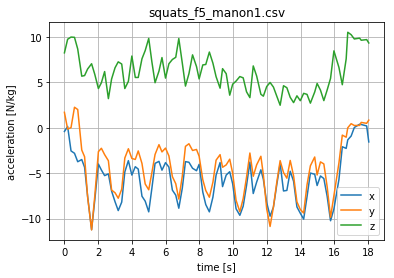

amplitude: {'x': 11.61, 'y': 13.51, 'z': 8.04}
mean:      {'x': -5.6, 'y': -4.29, 'z': 6.11}
std:       {'x': 2.68, 'y': 2.99, 'z': 2.11}


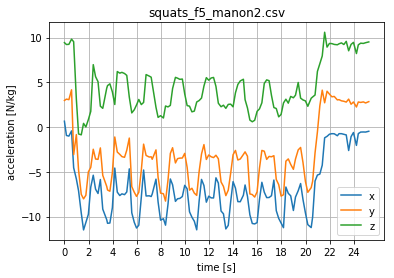

amplitude: {'x': 12.14, 'y': 12.43, 'z': 11.46}
mean:      {'x': -6.85, 'y': -3.09, 'z': 4.51}
std:       {'x': 3.31, 'y': 3.54, 'z': 2.84}


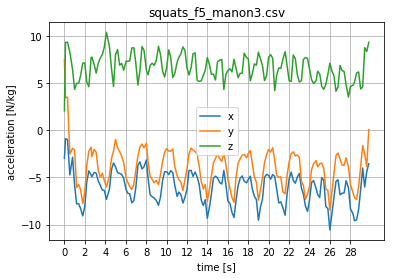

amplitude: {'x': 9.69, 'y': 15.98, 'z': 8.35}
mean:      {'x': -6.06, 'y': -3.91, 'z': 6.65}
std:       {'x': 1.72, 'y': 2.17, 'z': 1.4}


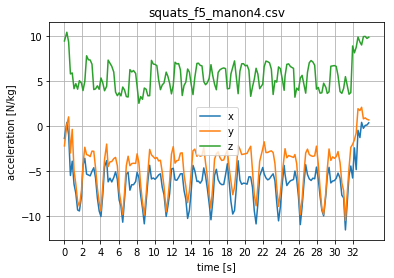

amplitude: {'x': 11.97, 'y': 12.61, 'z': 7.91}
mean:      {'x': -6.2, 'y': -4.36, 'z': 5.64}
std:       {'x': 2.29, 'y': 2.55, 'z': 1.69}


In [7]:
for f in data:
    if "squats" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.show()
        
        amplitude_temp = {}
        mean_temp = {}
        std_temp = {}
        for axe in data[f]:
            if axe=='timestamp':
                continue
            amplitude_temp[axe] = round(max(data[f][axe])-min(data[f][axe]), 2)
            mean_temp[axe] = round(np.mean(data[f][axe]), 2)
            std_temp[axe] = round(np.std(data[f][axe]), 2)            
            
        print('amplitude: ' + str(amplitude_temp))
        print('mean:      ' + str(mean_temp))
        print('std:       ' + str(std_temp))

### Dorsaux

c:\users\manon.racine1\appdata\local\continuum\anaconda2\envs\qself\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


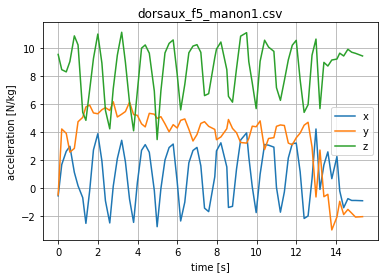

amplitude: {'x': 7.0, 'y': 9.18, 'z': 7.69}
mean:      {'x': 0.86, 'y': 3.51, 'z': 8.48}
std:       {'x': 1.92, 'y': 2.31, 'z': 1.9}


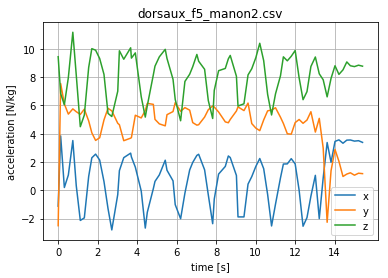

amplitude: {'x': 6.65, 'y': 10.05, 'z': 6.68}
mean:      {'x': 0.88, 'y': 4.49, 'z': 8.09}
std:       {'x': 1.84, 'y': 1.78, 'z': 1.52}


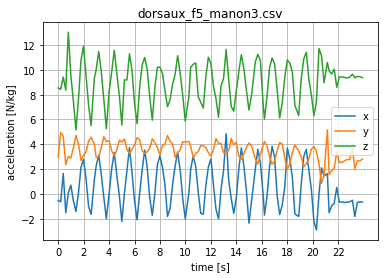

amplitude: {'x': 7.75, 'y': 4.31, 'z': 7.87}
mean:      {'x': 0.57, 'y': 3.45, 'z': 8.99}
std:       {'x': 1.78, 'y': 0.78, 'z': 1.67}


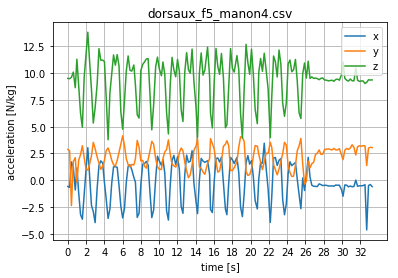

amplitude: {'x': 8.1, 'y': 6.52, 'z': 10.04}
mean:      {'x': -0.14, 'y': 2.15, 'z': 9.34}
std:       {'x': 1.81, 'y': 1.06, 'z': 2.09}


In [8]:
for f in data:
    if "dorsaux" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.show()
        
        amplitude_temp = {}
        mean_temp = {}
        std_temp = {}
        for axe in data[f]:
            if axe=='timestamp':
                continue
            amplitude_temp[axe] = round(max(data[f][axe])-min(data[f][axe]), 2)
            mean_temp[axe] = round(np.mean(data[f][axe]), 2)
            std_temp[axe] = round(np.std(data[f][axe]), 2)            
            
        print('amplitude: ' + str(amplitude_temp))
        print('mean:      ' + str(mean_temp))
        print('std:       ' + str(std_temp))

### Sauts à la corde

c:\users\manon.racine1\appdata\local\continuum\anaconda2\envs\qself\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


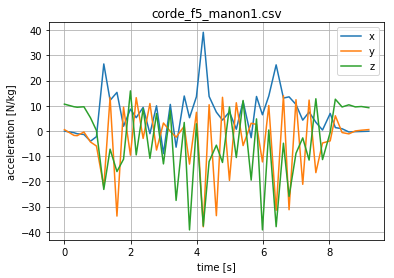

amplitude: {'x': 48.16, 'y': 52.02, 'z': 55.17}
mean:      {'x': 6.62, 'y': -3.59, 'z': -4.39}
std:       {'x': 8.9, 'y': 13.82, 'z': 15.26}


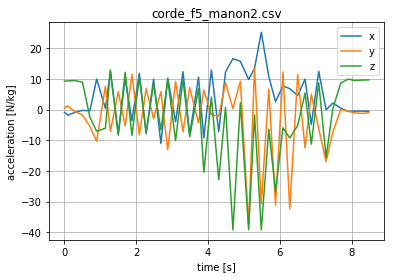

amplitude: {'x': 36.28, 'y': 51.44, 'z': 52.24}
mean:      {'x': 4.13, 'y': -2.7, 'z': -2.98}
std:       {'x': 8.25, 'y': 12.0, 'z': 13.99}


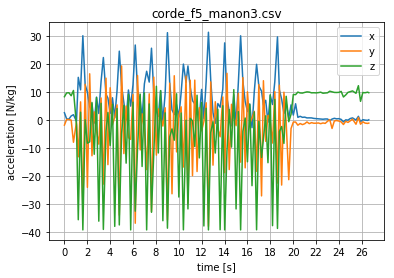

amplitude: {'x': 34.02, 'y': 57.19, 'z': 51.42}
mean:      {'x': 6.89, 'y': -2.84, 'z': -4.44}
std:       {'x': 7.97, 'y': 12.46, 'z': 16.99}


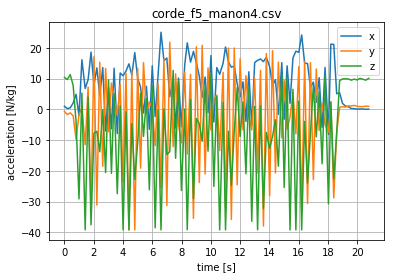

amplitude: {'x': 33.24, 'y': 61.03, 'z': 51.89}
mean:      {'x': 8.26, 'y': -3.06, 'z': -8.49}
std:       {'x': 8.24, 'y': 16.2, 'z': 16.86}


In [9]:
for f in data:
    if "corde" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.show()
        
        amplitude_temp = {}
        mean_temp = {}
        std_temp = {}
        for axe in data[f]:
            if axe=='timestamp':
                continue
            amplitude_temp[axe] = round(max(data[f][axe])-min(data[f][axe]), 2)
            mean_temp[axe] = round(np.mean(data[f][axe]), 2)
            std_temp[axe] = round(np.std(data[f][axe]), 2)            
            
        print('amplitude: ' + str(amplitude_temp))
        print('mean:      ' + str(mean_temp))
        print('std:       ' + str(std_temp))

### Plots des sessions complètes

Cette section sert juste à voir les différents enregistrements que nous avons de sessions complètes.

In [10]:
data_session ={}
for f in listdir(path):
    if not 'D' in f:
        continue
    print(f)
    data_session[f] = pd.read_csv(path+f)
    start_time = data_session[f]["timestamp"][0]
    data_session[f]["timestamp"] = (data_session[f]["timestamp"]-start_time)/1000

A_C_S_D.csv
D_C_A_S.csv
D_C_A_S2.csv
S_A_D_C1.csv
S_A_D_C2.csv


c:\users\manon.racine1\appdata\local\continuum\anaconda2\envs\qself\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


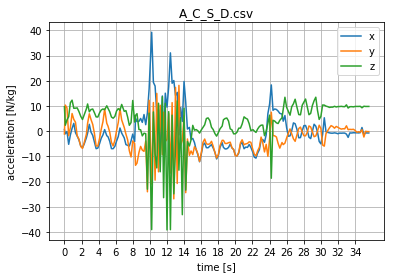

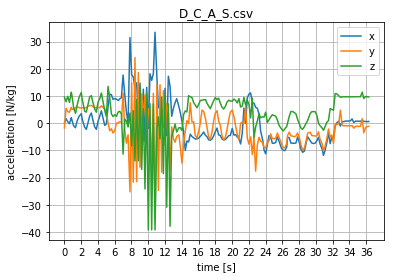

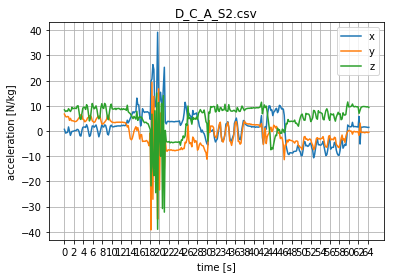

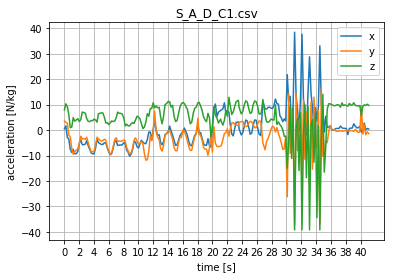

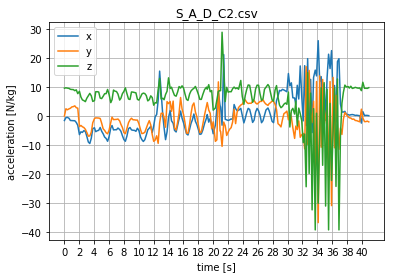

In [11]:
for f in data_session:
    data_session[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
    pl.ylabel('acceleration [N/kg]')
    pl.xlabel('time [s]')
    pl.xticks(np.arange(min(data_session[f]["timestamp"]), max(data_session[f]["timestamp"]), step=2))

# Découpage des fichiers
Découpage des fichiers en tranches de 10 points, ce qui correspond à environ 2 secondes.

Stockage dans un dictionnaire, avec les différents exercices comme clés.

In [12]:
storage_raw = slice_generation(data)

In [13]:
storage = {}
for label in storage_raw.keys():             # stack the recordings with the same label
    storage[label] = np.dstack(storage_raw[label])
    print('label', label, ':', storage[label].shape[2], 'samples')

# the resulting recordings shape is [n_samples x 6 x n_repetitions]

label idle : 74 samples
label abdos : 74 samples
label corde : 31 samples
label dorsaux : 46 samples
label squats : 95 samples


# Calcul des caractéristiques
Tout est repris et adapté à partir du labo 5 du cours QSelf. Pour chaque axe, on calcule la moyenne et l'écart-type.

In [14]:
features = {}

for label in storage.keys():
    #features[label] = np.mean(storage[label], axis=0).T
    #features[label] = np.std(storage[label], axis=0).T
    features[label] = np.hstack((np.mean(storage[label], axis=0).T, np.std(storage[label], axis=0).T))
    #features[label] = ((storage[label][:-1] * storage[label][1:]) < 0).sum().T
    
# the resulting features shape is [n_repetitions x n_features]

# Création d'un dataset
Les données sont séparées en input = caractéristiques calculées à partir des valeurs retournées par l'accéléromètre de la montre, et output = label de l'exercice

In [15]:
data_input = []
data_output = []
for label in features.keys():
    data_input.append(features[label])
    data_output.append(np.repeat(label, features[label].shape[0]))
data_input = np.vstack(data_input)
data_output = np.hstack(data_output)

# Visualisation avec PCA

In [16]:
results_pca = PCA(data_input)
print(results_pca)

First two components keep 95.35380969980832 percent of the total variance


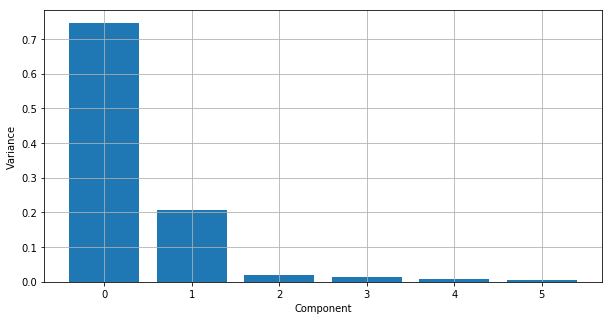

In [17]:
pl.figure(figsize=(10,5))
pl.bar(x=np.arange(len(results_pca.fracs)), height=results_pca.fracs)
pl.ylabel('Variance')
pl.xlabel('Component')
pl.grid()

print('First two components keep', 100*(results_pca.fracs[0] + results_pca.fracs[1]), 'percent of the total variance')

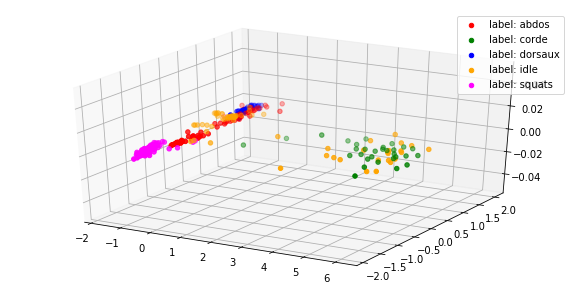

In [18]:
colors = ['red', 'green', 'blue', 'orange', 'magenta', 'cyan']

labels = storage.keys()

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
for i,l in enumerate(sorted(labels)):
    this_labels = results_pca.Y[data_output==l,:]
    ax.scatter(this_labels[:,0], this_labels[:,1], c=colors[i], label='label: '+l)
pl.legend()
pl.grid()

# Classification

## Conversion des labels en chiffres

In [19]:
#convert output values to int
label_dict = {'abdos':1, 'squats':2, 'dorsaux':3, 'corde':4, 'idle':5}
value_dict = {1.:'abdos', 2.:'squats', 3.:'dorsaux', 4.:'corde', 5.:'idle'}
data_output_num = -1 * np.ones(len(data_output))
for i, val in enumerate(data_output):
    data_output_num[i] = label_dict[val]

## Préparation d'une session complète
La cellule suivante réalise les étapes de "mise en forme" d'un fichier contenant les 4 exrecices, afin d'obtenir les prévisions du classificateur au fur et à mesure des entraînements qu'il subit avec les données classifiées manuellement.
- import
- découpage
- caractéristiques
- dataset

In [36]:
chosen_data_session = {}
f = 'D_C_A_S2.csv'
#f = 'D_C_A_S.csv'
#f = 'S_A_D_C2.csv'
#f='dorsaux_f5_manon3.csv'
chosen_data_session[f] = pd.read_csv(path+f)
start_time = chosen_data_session[f]["timestamp"][0]
chosen_data_session[f]["timestamp"] = (chosen_data_session[f]["timestamp"]-start_time)/1000

storage_session = slice_generation(chosen_data_session, label = False)

for label in storage_session.keys():             # stack the recordings with the same label
    storage_session[label] = np.dstack(storage_session[label])
    print('label', label, ':', storage_session[label].shape[2], 'samples')

# the resulting recordings shape is [n_samples x 6 x n_repetitions]

features_session = {}

for label in storage_session.keys():
    #features_session[label] = np.mean(storage_session[label], axis=0).T
    #features_session[label] = np.std(storage_session[label], axis=0).T
    features_session[label] = np.hstack((np.mean(storage_session[label], axis=0).T, np.std(storage_session[label], axis=0).T))
    
# the resulting features shape is [n_repetitions x n_features]

data_session_input = []
data_session_output = []
for label in features_session.keys():
    data_session_input.append(features_session[label])
    data_session_output.append(np.repeat(label, features_session[label].shape[0]))
data_session_input = np.vstack(data_session_input)
data_session_output = np.hstack(data_session_output)

data_session_output_num = -1 * np.ones(len(data_session_output))

label unknown : 63 samples


In [37]:
N_NEIGHBORS = 3

# leave-one-out cross-validation:
# given N observations, use N-1 observations to fit the model
# and classify the observation that was not used for fitting
    

model_classification = -1 * np.ones(len(data_output))

session_model_classification = []

for v_index in range(len(data_output)):
    data_input_calib = np.delete(data_input, v_index, axis=0)
    data_input_test = data_input[v_index:v_index+1, :]
    
    data_output_calib = np.delete(data_output_num, v_index)
    data_output_test = data_output_num[v_index]
    
    model = knn.KNeighborsClassifier(N_NEIGHBORS, 'uniform')
#    model = knn.KNeighborsClassifier(N_NEIGHBORS, 'distance')
    model.fit(data_input_calib, data_output_calib)
    
    session_model_classification.append(model.predict(data_session_input))
    model_classification[v_index] = model.predict(data_input_test) 

# Résultats

## Résultats de la "leave-one-out cross-validation"

In [38]:
# accuracy
acc = 100 * np.sum(model_classification == data_output_num) / len(data_output)
print('accuracy: ', acc, '%')

accuracy:  87.5 %


In [39]:
# confusion matrix
confusion_matrix = cm(data_output_num, model_classification)

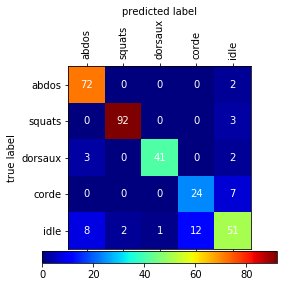

In [40]:
labels = []
for i, val in enumerate(list(set(data_output_num))):
    labels.append(value_dict[val])
plot_confusion_matrix(confusion_matrix, labels)

## Prévisions pour la session de test

In [41]:
unique, counts = np.unique(session_model_classification, return_counts=True)
print("Number of previsions for each category : ")
print(dict(zip(unique, counts)))
mean_session_model_classification = np.mean(session_model_classification, axis=0).T

print("Mean for each session slice : ")
print(mean_session_model_classification)

Number of previsions for each category : 
{1.0: 8958, 2.0: 4480, 3.0: 3200, 4.0: 1598, 5.0: 1924}
Mean for each session slice : 
[3.      3.      3.      3.      3.      3.      3.      3.      3.
 3.      1.      1.      1.      1.      1.      1.      1.025   4.00625
 4.00625 4.      4.00625 4.99375 2.      2.      4.      1.025   4.975
 4.975   1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      5.      1.      1.      4.975   1.025   1.
 1.01875 2.      2.      2.      2.      2.      2.      2.      2.
 2.      2.      2.      2.      1.      1.      5.      1.      1.     ]


c:\users\manon.racine1\appdata\local\continuum\anaconda2\envs\qself\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


['dorsaux', 'dorsaux', 'dorsaux', 'dorsaux', 'dorsaux', 'dorsaux', 'dorsaux', 'dorsaux', 'dorsaux', 'dorsaux', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'corde', 'corde', 'corde', 'corde', 'idle', 'squats', 'squats', 'corde', 'abdos', 'idle', 'idle', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'abdos', 'idle', 'abdos', 'abdos', 'idle', 'abdos', 'abdos', 'abdos', 'squats', 'squats', 'squats', 'squats', 'squats', 'squats', 'squats', 'squats', 'squats', 'squats', 'squats', 'squats', 'abdos', 'abdos', 'idle', 'abdos', 'abdos']

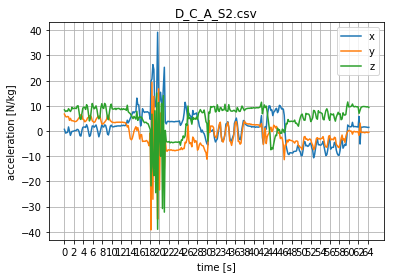

In [42]:
# round results and replace ints with corresponding text label
session_model_classification_labels = []
for i, val in enumerate(mean_session_model_classification):
    session_model_classification_labels.append(value_dict[int(round(val))])
    
# plot session with determined labels
data_session[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
pl.ylabel('acceleration [N/kg]')
pl.xlabel('time [s]')
pl.xticks(np.arange(min(data_session[f]["timestamp"]), max(data_session[f]["timestamp"]), step=2))
print(session_model_classification_labels, end='')

# Propriétés des mouvements

In [27]:
# storage_raw['sport'][n=file selection][n=axe][n=sample]
storage_raw['abdos']

storage_temp = {}

for label in storage_raw.keys():
    storage_temp[label] = pd.concat(storage_raw[label], axis=0)
    minimum = {}
    maximum = {}
    amplitude = {}
    mean = {}
    std = {}

    for axe in storage_temp[label]:
        minimum[axe] = min(storage_temp[label][axe])
        maximum[axe] = max(storage_temp[label][axe])
        #amplitude[axe] = round(maximum[axe]-minimum[axe], 2)
        mean[axe] = round(np.mean(storage_temp[label][axe]), 2)
        std[axe] = round(np.std(storage_temp[label][axe]), 2)
    
    print(label + ' min       ' + str(minimum))
    print(label + ' max       ' + str(maximum))
    #print(label + ' amplitude ' + str(amplitude))
    print(label + ' mean      ' + str(mean))
    print(label + ' std       ' + str(std))

idle min       {'x': -11.49, 'y': -39.23, 'z': -39.23}
idle max       {'x': 30.0, 'y': 21.8, 'z': 13.82}
idle mean      {'x': 2.35, 'y': 0.03, 'z': 3.48}
idle std       {'x': 6.43, 'y': 9.58, 'z': 12.46}
abdos min       {'x': -7.26, 'y': -8.24, 'z': -1.23}
abdos max       {'x': 6.42, 'y': 9.86, 'z': 13.02}
abdos mean      {'x': -1.42, 'y': -0.16, 'z': 7.88}
abdos std       {'x': 3.28, 'y': 4.24, 'z': 2.4}
corde min       {'x': -11.03, 'y': -37.99, 'z': -39.23}
corde max       {'x': 39.21, 'y': 19.23, 'z': 15.94}
corde mean      {'x': 8.43, 'y': -3.38, 'z': -8.7}
corde std       {'x': 8.63, 'y': 14.53, 'z': 16.54}
dorsaux min       {'x': -2.9, 'y': -3.0, 'z': 3.47}
dorsaux max       {'x': 4.85, 'y': 7.55, 'z': 13.03}
dorsaux mean      {'x': 0.73, 'y': 4.13, 'z': 8.5}
dorsaux std       {'x': 1.84, 'y': 1.22, 'z': 1.82}
squats min       {'x': -11.53, 'y': -11.25, 'z': -0.87}
squats max       {'x': 0.44, 'y': 4.12, 'z': 10.59}
squats mean      {'x': -6.67, 'y': -4.42, 'z': 5.42}
squats std

In [28]:
min(storage_temp['idle']['z'])

-39.23